In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [23]:

df = pd.read_csv('StudentsPerformance.csv')


df.head()


gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [7]:

df.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
df.describe()


math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

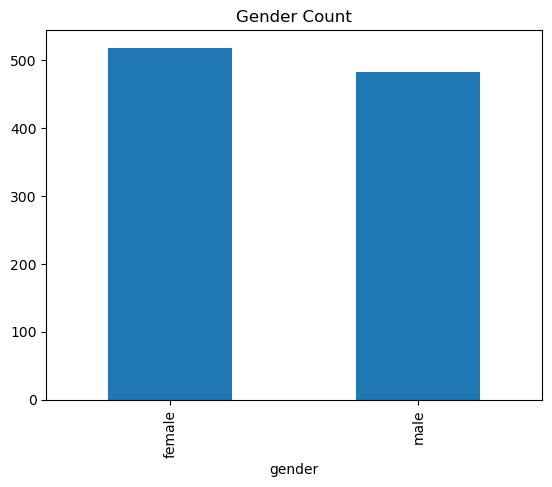

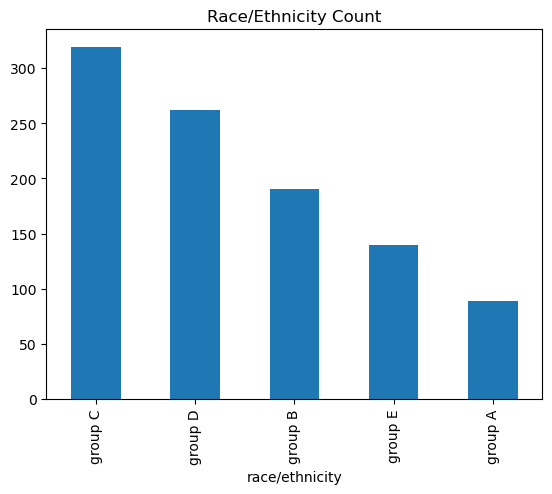

In [11]:
df['gender'].value_counts().plot(kind='bar', title='Gender Count')
plt.show()

df['race/ethnicity'].value_counts().plot(kind='bar', title='Race/Ethnicity Count')
plt.show()


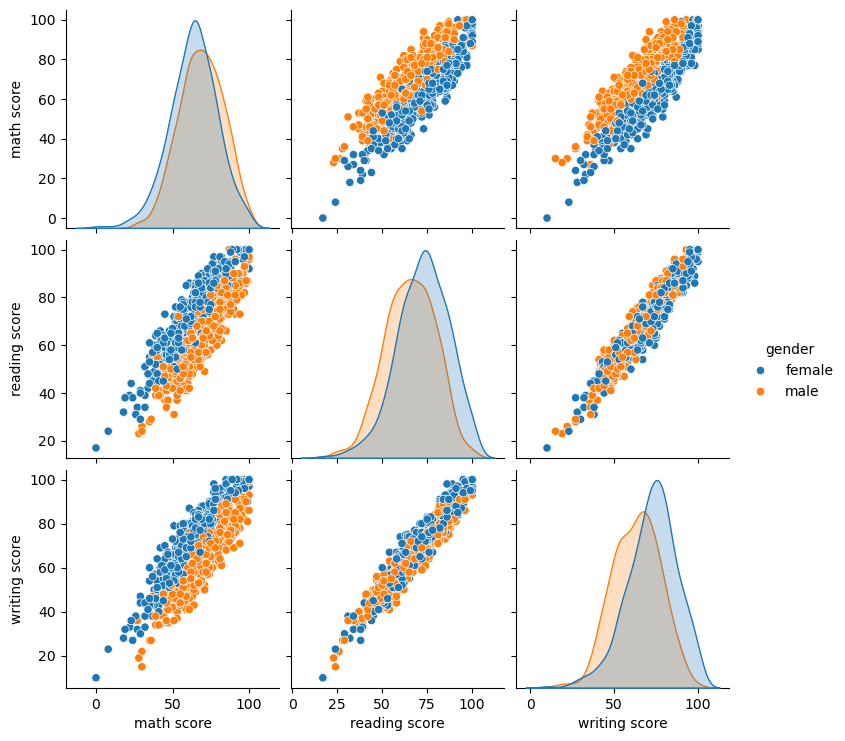

In [13]:
sns.pairplot(df, hue='gender')
plt.show()


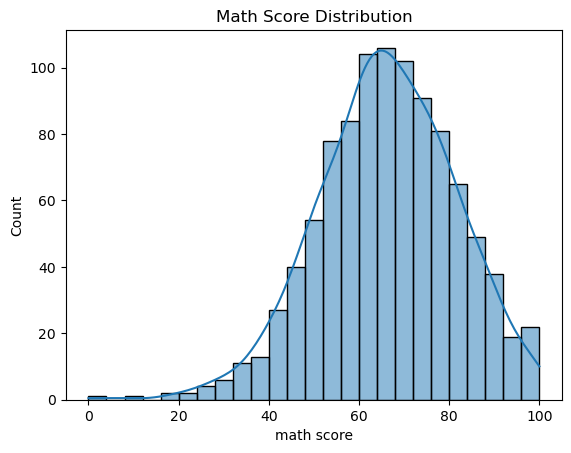

In [15]:
sns.histplot(df['math score'], kde=True)
plt.title('Math Score Distribution')
plt.show()


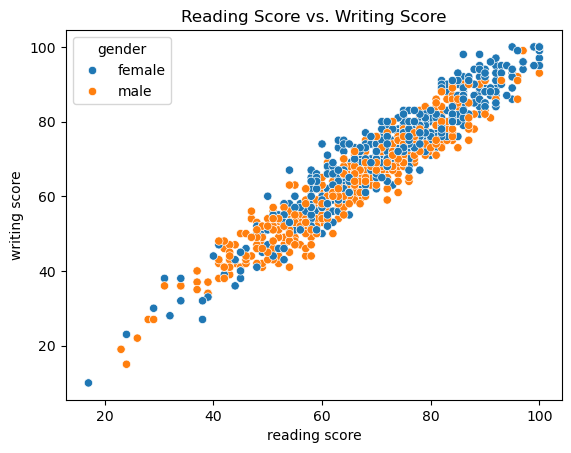

In [17]:
sns.scatterplot(x='reading score', y='writing score', hue='gender', data=df)
plt.title('Reading Score vs. Writing Score')
plt.show()


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert categorical features to numerical
df = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df.drop(columns=['math score'])
y = df['math score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))


Mean Squared Error: 29.095169866715477
R^2 Score: 0.8804332983749565
